In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import shnitsel as sh

In [2]:
ensemble = sh.open_frames('/nc/SHNITSEL_databases/dynamic/A01_ethene_dynamic.nc')

In [5]:
per_state = sh.get_per_state(ensemble)
per_state.coords['_state'] = 'state', np.strings.mod("$S_{%d}$", per_state.state - 1)
per_state

<xarray.Dataset> Size: 13MB
Dimensions:   (state: 3, frame: 133109)
Coordinates:
  * state     (state) int64 24B 1 2 3
  * frame     (frame) object 1MB MultiIndex
  * trajid    (frame) int64 1MB 2 2 2 2 2 2 2 2 ... 962 962 962 962 962 962 962
  * time      (frame) float64 1MB 0.0 0.5 1.0 1.5 ... 167.5 168.0 168.5 169.0
    _state    (state) <U7 84B '$S_{0}$' '$S_{1}$' '$S_{2}$'
Data variables:
    forces    (state, frame) float64 3MB 0.2626 nan nan nan ... nan nan nan nan
    dip_perm  (state, frame) float64 3MB 0.008603 0.006999 ... 0.6768 0.6944
    energy    (state, frame) float64 3MB ...

zmin=1.0,zmax=77.0


Text(0, 0.5, '$\\mathbf{F}$ / hartree/bohr')

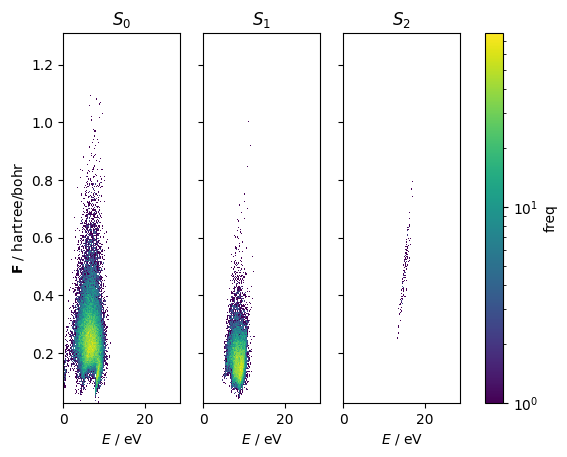

In [6]:
xvar = 'energy'
yvar = 'forces'
range_ = [
    [np.nanmin(per_state[xvar]).item(), np.nanmax(per_state[xvar]).item()],
    [np.nanmin(per_state[yvar]).item(), np.nanmax(per_state[yvar]).item()]
]
nstates = per_state.sizes['state']
fig, axs = plt.subplots(1, nstates, sharey=True)
def get_label(da):
    return f"{da.attrs['long_name']} / {da.attrs['units']}"
xlabel = get_label(per_state[xvar])
ylabel = get_label(per_state[yvar])

hists = []
qms = []
for i, (state, sdata) in enumerate(per_state.groupby('state')):
    sdata = sdata.squeeze('state')
    hist, _, _, qm = axs[i].hist2d(xvar, yvar, data=sdata, label=state, bins=300, range=range_)
    hists.append(hist)
    qms.append(qm)
    axs[i].set_xlabel(xlabel)
    axs[i].set_title(sdata._state.item())

# ensure consistent colour scale across subplots
hists = np.array(hists)
hists[hists==0] = np.nan
zmin = np.nanmin(hists).item()
zmax = np.nanmax(hists).item()
print(f"{zmin=},{zmax=}")

# for a linear colour scale, change `LogNorm` to `Normalize` on the following line:
cnorm = mpl.colors.LogNorm(zmin, zmax)
for qm in qms:
    qm.set_norm(cnorm)
fig.colorbar(qms[0], ax=axs, label='freq')
axs[0].set_ylabel(ylabel)